In [2]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [3]:
np.random.seed(42)

In [7]:
n = 100
h = 59
a = 10
b = 10
sigma = 0.3
theta = 0.1
niters = 10000
thetas = np.linspace(0, 1, 200)
samples = np.zeros(niters+1)
samples[0] = theta

def prob(theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        prior = st.beta(a, b).pdf(theta)
        likelihood = st.binom(n, theta).pmf(h)
        return likelihood * prior
    
for i in range(niters):
    theta_p = theta + st.norm(0, sigma).rvs()
    rho = min(1, prob(theta_p) / prob(theta))
    u = np.random.uniform()
    if u < rho:
        # Accept proposal
        theta = theta_p
    else:
        # Reject proposal
        pass
    samples[i+1] = theta

In [8]:
prior = st.beta(a, b).pdf(thetas)
post = st.beta(h+a, n-h+b).pdf(thetas)
likelihood = st.binom(n, thetas).pmf(h)

/Users/cmaklin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


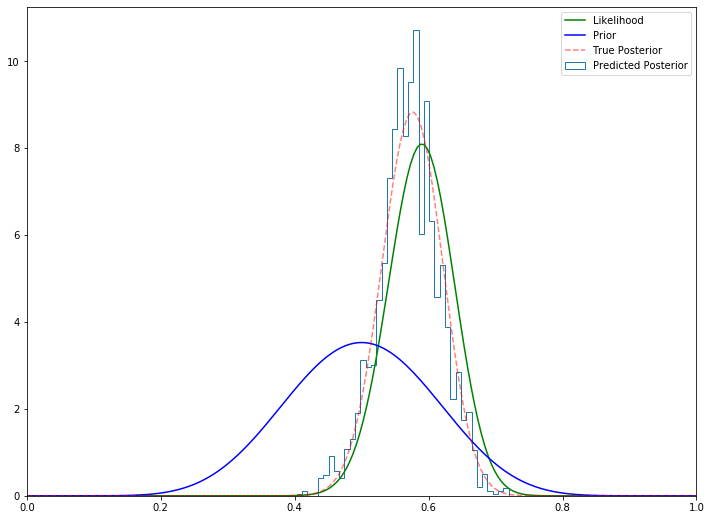

In [16]:
plt.figure(figsize=(12, 9))
plt.hist(samples[len(samples)//2:], 40, histtype='step', normed=True, linewidth=1, label='Predicted Posterior');
plt.plot(thetas, n*likelihood, label='Likelihood', c='green')
plt.plot(thetas, prior, label='Prior', c='blue')
plt.plot(thetas, post, c='red', linestyle='--', alpha=0.5, label='True Posterior')
plt.xlim([0,1]);
plt.legend(loc='best');